<span style="color:red">***This notebook should be run inside jupyter lab***</span>

# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

# Importing libs:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the interactive plotting libs
import holoviews as hv
from holoviews.operation.datashader import  inspect, rasterize
# colour maps lib
import colorcet as cc
# to convet the lat and lon to mercato web format
from datashader.utils import lnglat_to_meters
# panel lib for widgets and dashboards
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
1  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
2  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
3  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
4  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
5  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
6  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
7  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
8  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   
9  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   

  RadioConnectionType       Country RadioNetworkGeneration RadioOperatorName  \
0              Mobile  Saudi Arabia                     4G        Operator C   
1              Mobile  Saudi Arabia                     4G        Operator C   
2              Mobile  Saudi Arabia                     3G        Operator C   
3              Mobile  Saudi Arabia                     3G        Operator C   
4              Mobile  Saudi Arabia                     4G        Operator C   
5              Mobile  Saudi Arabia                     4G        Operator C   
6              Mobile  Saudi Arabia                     3G        Operator C   
7              Mobile  Saudi Arabia                     3G        Operator C   
8              Mobile  Saudi Arabia                     2G        Operator C   
9              Mobile  Saudi Arabia                     2G        Operator C   

         RSRP RadioMobileDataEnabled DeviceManufacturer           DeviceName  
0  2147483647                Enabled                HTC                D728W  
1  2147483647                Enabled                HTC  Desire 728 Dual Sim  
2  2147483647                Enabled                HTC                D728W  
3  2147483647                Enabled                HTC  Desire 728 Dual Sim  
4  2147483647                Enabled                HTC                D728W  
5  2147483647                Enabled                HTC  Desire 728 Dual Sim  
6  2147483647                Enabled                HTC                D728W  
7  2147483647                Enabled                HTC  Desire 728 Dual Sim  
8  2147483647                Enabled                HTC                D728W  
9  2147483647                Enabled                HTC  Desire 728 Dual Sim

In [4]:
RSRP_data.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
2071443  2019-11-03 20:15:50.030 +0300         24.728512          46.822723   
288732   2019-11-02 17:02:16.073 +0300         24.575623          46.772587   
1630352  2019-11-03 23:50:04.027 +0300         24.724096          46.822186   
1386412  2019-11-02 18:15:34.499 +0300         24.725697          46.647850   
234378   2019-11-02 07:37:50.120 +0300         24.556830          46.722977   
332531   2019-11-02 09:19:49.038 +0300         24.904207          46.388866   
2236055  2019-11-04 11:47:54.029 +0300         24.592460          46.715637   
49213    2019-11-02 05:52:10.048 +0300         24.596087          46.679897   
1087390  2019-11-02 18:44:45.001 +0300         24.684780          46.703720   
2248659  2019-11-03 10:50:37.441 +0300         24.755844          46.654552   
1697717  2019-11-04 05:44:45.035 +0300         24.861760          46.849190   
226494   2019-11-02 17:13:18.074 +0300         24.533258          46.696964   
1859105  2019-11-03 18:43:53.364 +0300         24.633272          46.737000   
2086198  2019-11-03 19:08:12.001 +0300         24.766440          46.679813   
2403173  2019-11-04 23:13:03.509 +0300         24.765024          46.670563   
1066170  2019-11-03 22:36:23.000 +0300         24.769688          46.794773   
243922   2019-11-02 18:13:09.024 +0300         24.593958          46.711910   
346285   2019-11-02 20:20:40.034 +0300         24.761745          46.798393   
293944   2019-11-02 08:34:21.035 +0300         24.700050          46.569626   
1420770  2019-11-04 20:50:24.126 +0400         24.611237          46.724545   

        RadioConnectionType       Country RadioNetworkGeneration  \
2071443              Mobile  Saudi Arabia                     3G   
288732               Mobile  Saudi Arabia                     4G   
1630352              Mobile  Saudi Arabia                     3G   
1386412              Mobile  Saudi Arabia                     4G   
234378               Mobile  Saudi Arabia                     4G   
332531               Mobile  Saudi Arabia                     4G   
2236055              Mobile  Saudi Arabia                     4G   
49213                Mobile  Saudi Arabia                     4G   
1087390              Mobile  Saudi Arabia                     3G   
2248659              Mobile  Saudi Arabia                     4G   
1697717              Mobile  Saudi Arabia                     4G   
226494               Mobile  Saudi Arabia                     4G   
1859105              Mobile  Saudi Arabia                     4G   
2086198              Mobile  Saudi Arabia                     4G   
2403173              Mobile  Saudi Arabia                     4G   
1066170              Mobile  Saudi Arabia                     4G   
243922               Mobile  Saudi Arabia                     3G   
346285               Mobile  Saudi Arabia                     4G   
293944               Mobile  Saudi Arabia                     3G   
1420770              Mobile  Saudi Arabia                     3G   

        RadioOperatorName        RSRP RadioMobileDataEnabled  \
2071443        Operator B  2147483647                Enabled   
288732         Operator B         -75                Enabled   
1630352        Operator B  2147483647                Enabled   
1386412        Operator B         -96                Enabled   
234378         Operator A         -93                Enabled   
332531         Operator A         -92                Enabled   
2236055        Operator A         -82                Enabled   
49213          Operator A         -83                Enabled   
1087390        Operator A  2147483647                Enabled   
2248659        Operator B         -66                Enabled   
1697717        Operator A         -73                Enabled   
226494         Operator B         -77                Enabled   
1859105        Operator B         -81                Enabled   
2086198        Operator C         -75       

In [5]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


There is categorical data but it's treated as it is a string, I'll convert it into the category data type

In [6]:
cols = [
       "RadioConnectionType",
       "RadioNetworkGeneration",
       "RadioOperatorName",
       "RadioMobileDataEnabled",
       "DeviceManufacturer",
       "DeviceName"
      ]
RSRP_data[cols] = RSRP_data[cols].astype('category')

In [7]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Timestamp               object  
 1   LocationLatitude        float64 
 2   LocationLongitude       float64 
 3   RadioConnectionType     category
 4   Country                 object  
 5   RadioNetworkGeneration  category
 6   RadioOperatorName       category
 7   RSRP                    int64   
 8   RadioMobileDataEnabled  category
 9   DeviceManufacturer      category
 10  DeviceName              category
dtypes: category(6), float64(2), int64(1), object(2)
memory usage: 122.2+ MB


In [8]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [9]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [10]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [11]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [12]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [13]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [14]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [15]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

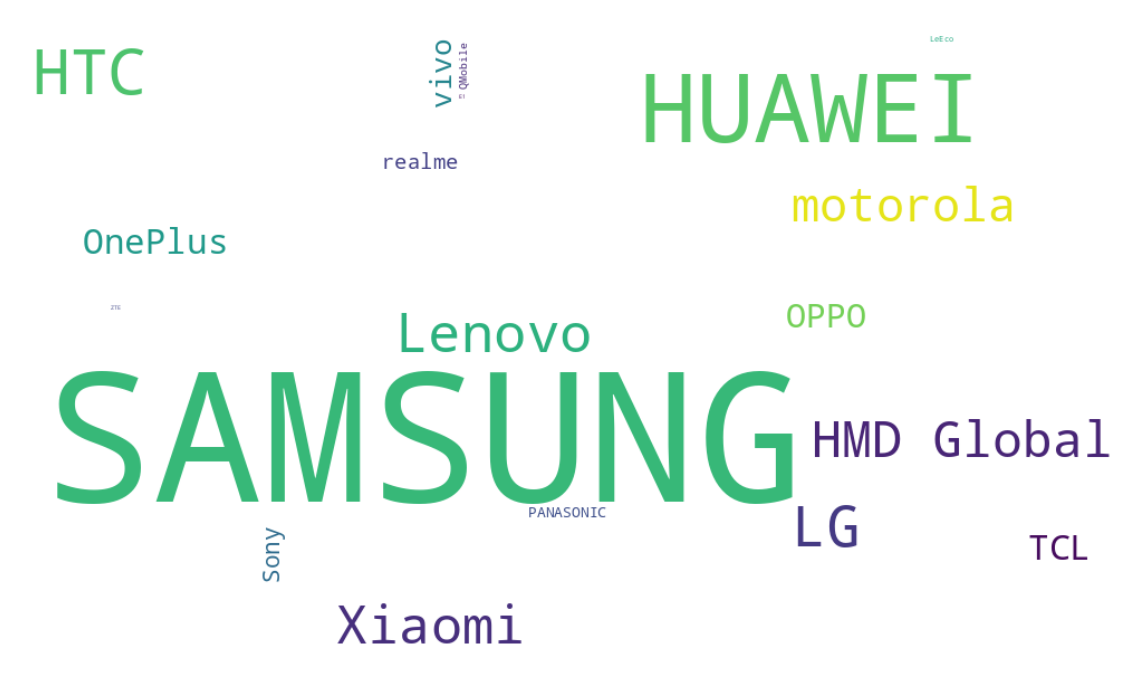

In [16]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

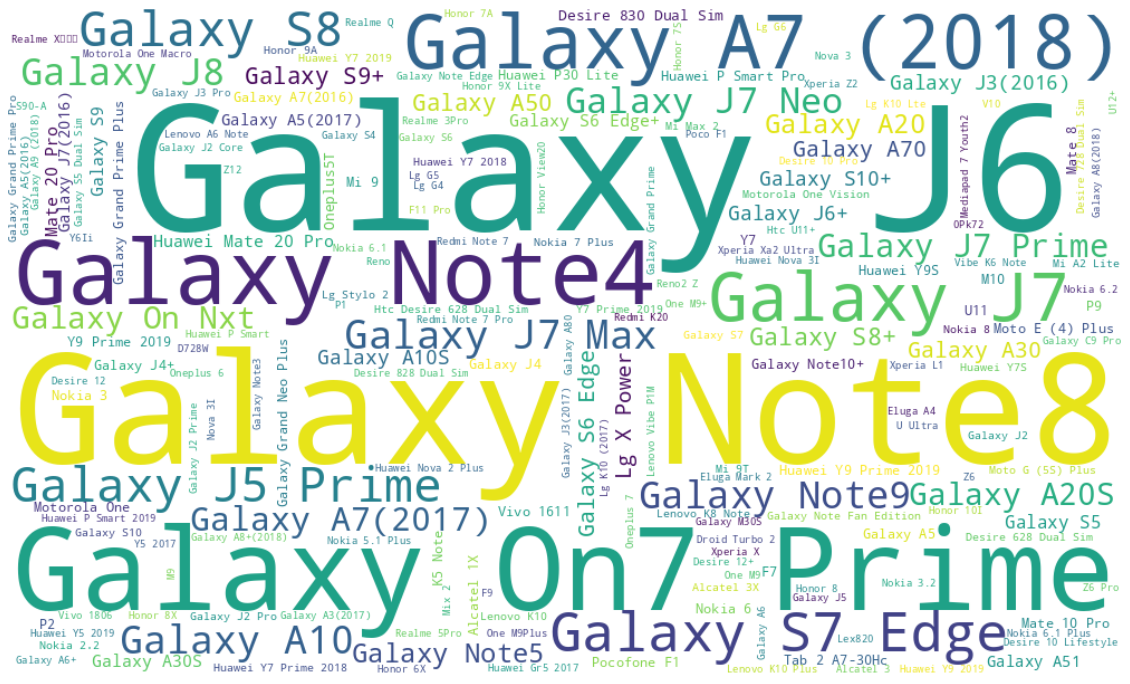

In [17]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted to the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [18]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [19]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     category           
 4   RadioNetworkGeneration  category           
 5   RadioOperatorName       category           
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  category           
 8   DeviceManufacturer      category           
 9   DeviceName              category           
dtypes: category(6), datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 101.4 MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [20]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [21]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [22]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
print(RSRP_data_invalid.shape)
RSRP_data_invalid.sample(20)

(644163, 10)


Timestamp  LocationLatitude  LocationLongitude  \
2650432 2019-11-02 17:58:27.769000+00:00         24.615020          46.503567   
1777746 2019-11-04 19:05:26.999000+00:00         24.732573          46.707750   
441685  2019-11-02 06:30:45.028000+00:00         24.812794          46.759747   
1244833 2019-11-03 06:45:59.018000+00:00         24.521360          46.870930   
2372184 2019-11-04 16:35:30.001000+00:00         24.809267          46.517110   
684592  2019-11-03 17:30:21.017000+00:00         24.745785          46.651330   
1638085 2019-11-03 15:13:43.039000+00:00         24.560349          46.636234   
2067162 2019-11-03 13:08:29.022000+00:00         24.807291          46.770270   
325882  2019-11-02 07:00:09.034000+00:00         24.676632          46.683660   
1402301 2019-11-03 10:39:29.014000+00:00         24.581831          46.835316   
1841143 2019-11-04 06:53:28.050000+00:00         24.851896          46.862400   
953297         2019-11-03 11:18:19+00:00         24.778164          46.803062   
521863         2019-11-02 16:31:56+00:00         24.815536          46.732628   
2510415 2019-11-04 18:59:18.070000+00:00         24.739527          46.836018   
1481803 2019-11-03 15:30:27.653000+00:00         24.694208          46.677177   
2409394 2019-11-04 05:13:04.023000+00:00         24.817255          46.753230   
723645  2019-11-02 19:39:41.040000+00:00         24.810608          46.704884   
1757189 2019-11-03 13:29:47.028000+00:00         24.588198          46.713360   
178654  2019-11-02 03:54:47.017000+00:00         24.723269          46.775300   
2070782 2019-11-03 16:42:36.021000+00:00         24.719658          46.821808   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
2650432                WiFi                     3G        Operator B   
1777746              Mobile                     4G        Operator C   
441685               Mobile                     3G        Operator B   
1244833              Mobile                     4G        Operator A   
2372184              Mobile                     3G        Operator C   
684592               Mobile                     3G        Operator A   
1638085              Mobile                     4G        Operator A   
2067162              Mobile                     3G        Operator B   
325882               Mobile                     3G        Operator A   
1402301              Mobile                     4G        Operator A   
1841143              Mobile                     4G        Operator B   
953297               Mobile                     3G        Operator B   
521863               Mobile                     3G        Operator A   
2510415              Mobile                     3G        Operator B   
1481803              Mobile                     4G        Operator C   
2409394              Mobile                     3G        Operator B   
723645               Mobile                     4G        Operator B   
1757189              Mobile                     3G        Operator A   
178654               Mobile                     4G        Operator C   
2070782              Mobile                     3G        Operator B   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
2650432  2147483647                Enabled            SAMSUNG   
1777746  2147483647                Enabled            SAMSUNG   
441685   2147483647                Enabled            SAMSUNG   
1244833  2147483647                Enabled            SAMSUNG   
2372184  2147483647                Enabled            SAMSUNG   
684592   2147483647                Enabled            SAMSUNG   
1638085  2147483647                Enabled            SAMSUNG   
2067162  2147483647                Enabled            SAMSUNG   
325882   2147483647                Enabled            SAMSUNG   
1402301  2147483647                Enabled            SAMSUNG   
1841143  2147483647                Enabled            SAMSUNG   
953297   2147483647                E

In [23]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
print(RSRP_data.shape)
RSRP_data_valid.sample(20)

(2725353, 10)


Timestamp  LocationLatitude  LocationLongitude  \
1401324        2019-11-03 14:42:36+00:00         24.609537          46.749474   
1410564 2019-11-03 13:31:32.068000+00:00         24.627954          46.816093   
2154111        2019-11-04 12:38:25+00:00         24.686407          46.707317   
62458          2019-11-02 03:39:44+00:00         24.832588          46.759460   
2050997 2019-11-03 12:40:40.022000+00:00         24.586254          46.718708   
1943320        2019-11-04 10:34:39+00:00         24.690819          46.715160   
863883         2019-11-02 15:41:34+00:00         24.548174          46.513664   
1122320 2019-11-03 15:00:44.045000+00:00         24.696411          46.774240   
959440         2019-11-03 05:04:46+00:00         24.605076          46.692226   
2333349 2019-11-03 12:33:43.045000+00:00         24.601973          46.616160   
1591959        2019-11-03 13:13:46+00:00         24.779234          46.798990   
2349636 2019-11-03 14:45:12.999000+00:00         24.703602          46.722440   
116920         2019-11-02 04:09:01+00:00         24.490955          46.780117   
1373375 2019-11-02 15:22:25.017000+00:00         24.856852          46.646427   
233521  2019-11-02 15:00:29.062000+00:00         24.595919          46.844980   
2619323 2019-11-04 19:27:52.032000+00:00         24.624784          46.687836   
1153980 2019-11-02 16:59:26.001000+00:00         24.694063          46.648537   
371332  2019-11-02 07:02:13.054000+00:00         24.637821          46.794480   
417000  2019-11-03 14:04:13.999000+00:00         24.661270          46.726627   
751323  2019-11-02 05:55:38.022000+00:00         24.751919          46.721470   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
1401324              Mobile                     4G        Operator A   -78   
1410564              Mobile                     4G        Operator C   -97   
2154111              Mobile                     4G        Operator C   -83   
62458                Mobile                     4G        Operator C   -70   
2050997              Mobile                     4G        Operator A  -104   
1943320              Mobile                     4G        Operator A   -89   
863883               Mobile                     4G        Operator A   -91   
1122320              Mobile                     4G        Operator A  -107   
959440               Mobile                     4G        Operator B   -79   
2333349              Mobile                     4G        Operator B   -90   
1591959              Mobile                     4G        Operator C   -80   
2349636              Mobile                     4G        Operator A   -63   
116920               Mobile                     4G        Operator A  -110   
1373375              Mobile                     4G        Operator A   -96   
233521               Mobile                     4G        Operator A   -95   
2619323              Mobile                     4G        Operator A   -87   
1153980              Mobile                     4G        Operator A   -93   
371332               Mobile                     4G        Operator A   -83   
417000               Mobile                     4G        Operator B   -88   
751323               Mobile                     4G        Operator A   -93   

        RadioMobileDataEnabled DeviceManufacturer        DeviceName  
1401324                Enabled            SAMSUNG      Galaxy Note4  
1410564                Enabled            SAMSUNG        Galaxy S9+  
2154111                Enabled            SAMSUNG         Galaxy J6  
62458                  Enabled            SAMSUNG         Galaxy J6  
2050997                Enabled            SAMSUNG        Galaxy A10  
1943320                Enabled            SAMSUNG         Galaxy S9  
863883                 Enabled            SAMSUNG   Galaxy J5 Prime  
1122320                Enabled            SAMSUNG      Galaxy Note8  
959440                 Enabled            SAMSUNG        Gal

***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

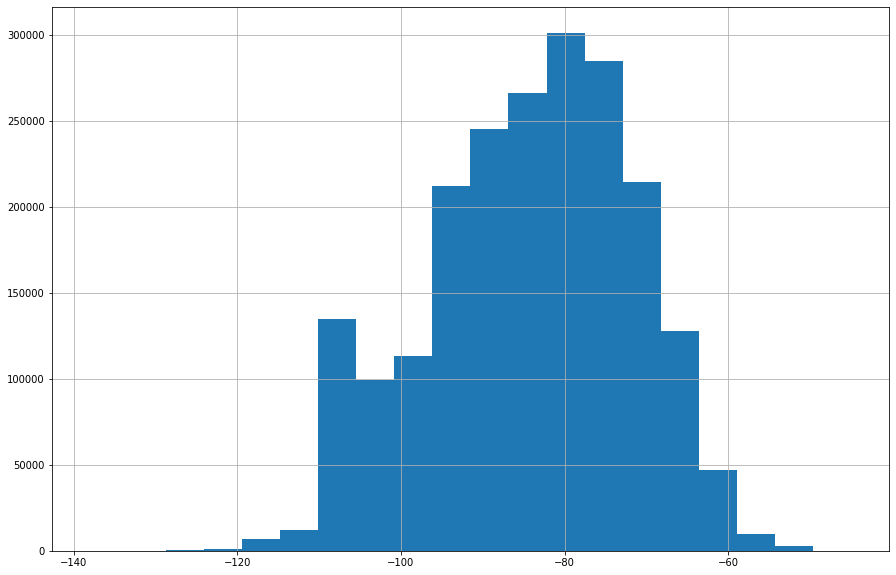

In [24]:
RSRP_data_valid["RSRP"].hist(figsize=(15,10), bins=20)
plt.show()

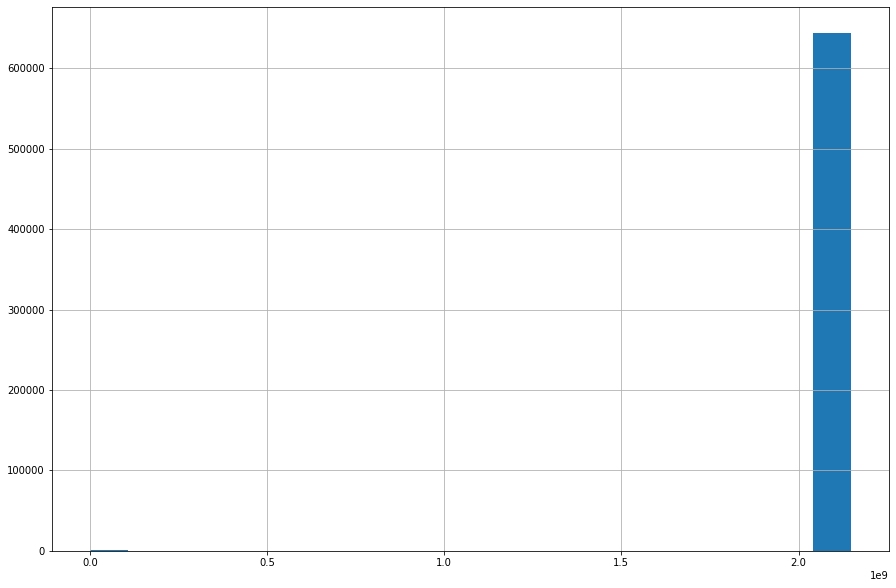

In [25]:
RSRP_data_invalid["RSRP"].hist(figsize=(15,10), bins=20)
plt.show()

Lookin at the histogram of these valid RSRP values, we see they are taking a bell curved shape. However, the invalid RSRP values are all almost the same invalid value, except for a few small values that are close to zero.
Looking for domain experience and by looking some the android documentation, I found out that this value (2147483647) is sent by the mobile phone when it can't read the RSRP value.

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

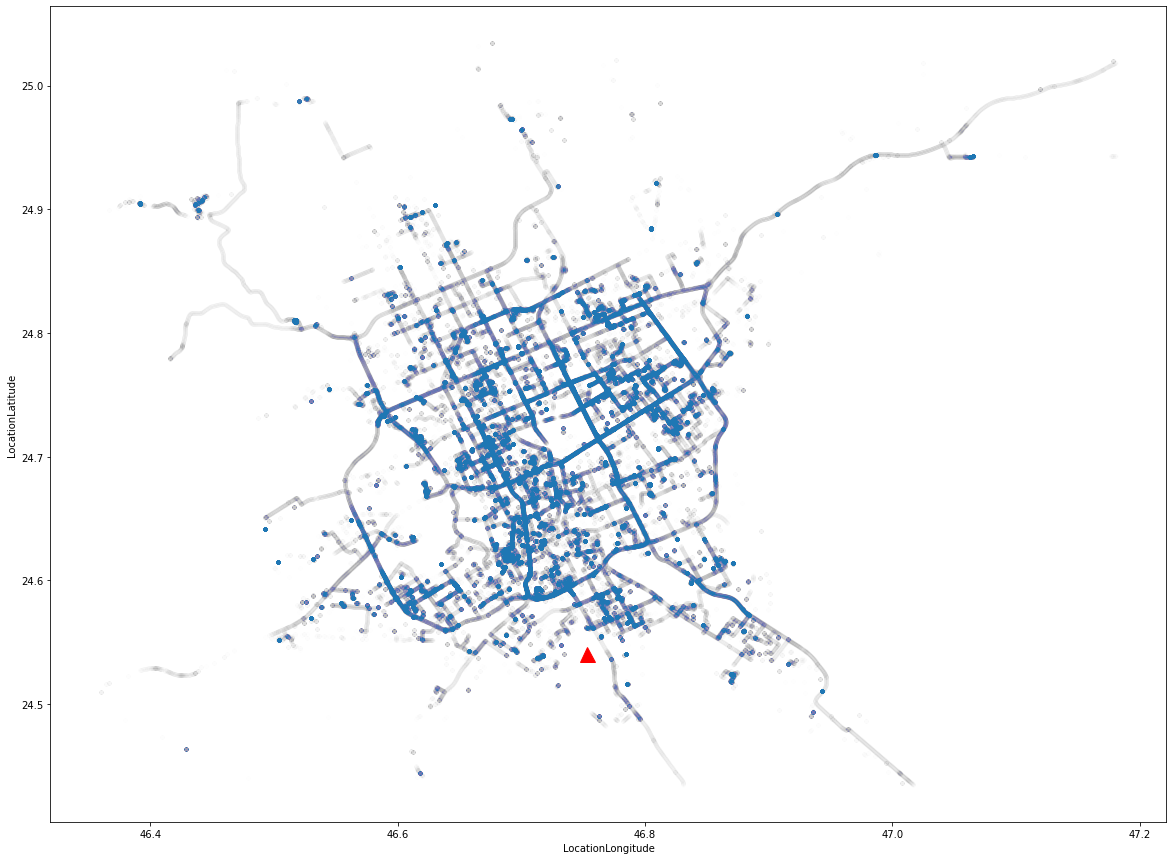

In [26]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

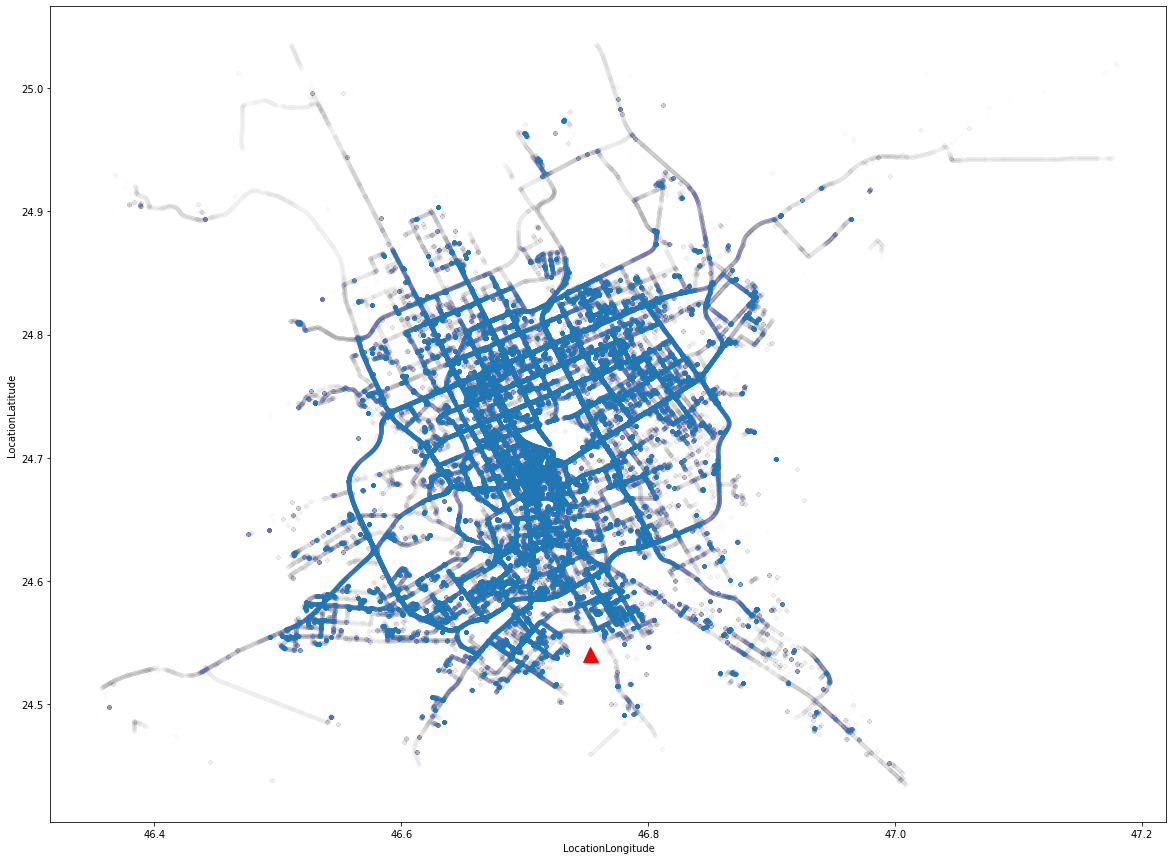

In [27]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [28]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
LAVA               6
ZTE                6
SHARP              5
LeEco              0
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [29]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [30]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
142014  2019-11-02 11:35:32.036000+00:00         24.826979          46.565147   
141911  2019-11-02 11:30:08.013000+00:00         24.830515          46.575780   
142066  2019-11-02 14:31:56.027000+00:00         24.629633          46.716557   
157117  2019-11-02 11:24:58.023000+00:00         24.824299          46.607850   
300060  2019-11-02 14:30:52.025000+00:00         24.630676          46.718544   
9877    2019-11-02 11:25:46.010000+00:00         24.821524          46.601640   
1547422 2019-11-04 14:38:30.510000+00:00         24.637589          46.710840   
299950  2019-11-02 11:32:06.043000+00:00         24.827572          46.566418   
142019  2019-11-02 13:55:31.107000+00:00         24.688833          46.724167   
141903  2019-11-02 11:29:44.076000+00:00         24.832070          46.579533   
2716152 2019-11-03 14:00:02.019000+00:00         24.663914          46.733120   
142041  2019-11-02 14:30:45.025000+00:00         24.630713          46.718674   
9889    2019-11-02 11:26:51.024000+00:00         24.822105          46.594788   
299898  2019-11-02 11:30:25.043000+00:00         24.829271          46.572780   
299952  2019-11-02 11:32:09.065000+00:00         24.827530          46.566260   
141791  2019-11-02 11:24:39.034000+00:00         24.826134          46.611120   
299766  2019-11-02 11:27:11.042000+00:00         24.824558          46.593525   
300088  2019-11-02 14:31:49.031000+00:00         24.629856          46.716970   
461198  2019-11-03 10:34:29.525000+00:00         24.743715          46.564750   
141895  2019-11-02 11:29:05.044000+00:00         24.834827          46.586052   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
142014               Mobile                     4G        Operator A     0   
141911               Mobile                     4G        Operator A     0   
142066               Mobile                     4G        Operator A     0   
157117               Mobile                     4G        Operator A     0   
300060               Mobile                     4G        Operator A     0   
9877                 Mobile                     4G        Operator A     0   
1547422              Mobile                     3G        Operator B     0   
299950               Mobile                     4G        Operator A     0   
142019               Mobile                     4G        Operator A     0   
141903               Mobile                     4G        Operator A     0   
2716152              Mobile                     4G        Operator A     0   
142041               Mobile                     4G        Operator A     0   
9889                 Mobile                     4G        Operator A     0   
299898               Mobile                     4G        Operator A     0   
299952               Mobile                     4G        Operator A     0   
141791               Mobile                     4G        Operator A     0   
299766               Mobile                     4G        Operator A     0   
300088               Mobile                     4G        Operator A     0   
461198               Mobile                     3G        Operator A     0   
141895               Mobile                     4G        Operator A     0   

        RadioMobileDataEnabled DeviceManufacturer DeviceName  
142014                 Enabled             HUAWEI       Y6Ii  
141911                 Enabled             HUAWEI       Y6Ii  
142066                 Enabled             HUAWEI       Y6Ii  
157117                 Enabled             HUAWEI       Y6Ii  
300060                 Enabled             HUAWEI       Y6Ii  
9877                   Enabled             HUAWEI       Y6Ii  
1547422                Enabled             HUAWEI   Honor 6X  
299950                 Enabled             HUAWEI       Y6Ii  
142019                 Enabled             HUAWEI       Y6Ii  
141903                 Enabled             HUAWEI       Y6Ii

Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [31]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"].shape

(1009, 10)

In [32]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"].shape

(429, 10)

In [33]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI        455
E1              0
OnePlus         0
SAMSUNG         0
realme          0
motorola        0
ZTE             0
Xiaomi          0
TCL             0
Sony            0
SHARP           0
QMobile         0
PANASONIC       0
OPPO            0
HMD Global      0
OBI             0
Mione           0
Lenovo          0
LeEco           0
LG              0
LAVA            0
Infinix         0
Hisense         0
HTC             0
vivo            0
Name: DeviceManufacturer, dtype: int64

We can see that this an issue only happening with HUAWEI devices and especially the model Y6li. Out of the 1009 devices, 429 devices reported a value of 0 for the RSRP.

In [34]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
Lg Stylus2               0
Lg Stylus 2              0
Lg G6                    0
Redmi Note 5A            0
0Pk72                    0
Name: DeviceName, Length: 292, dtype: int64

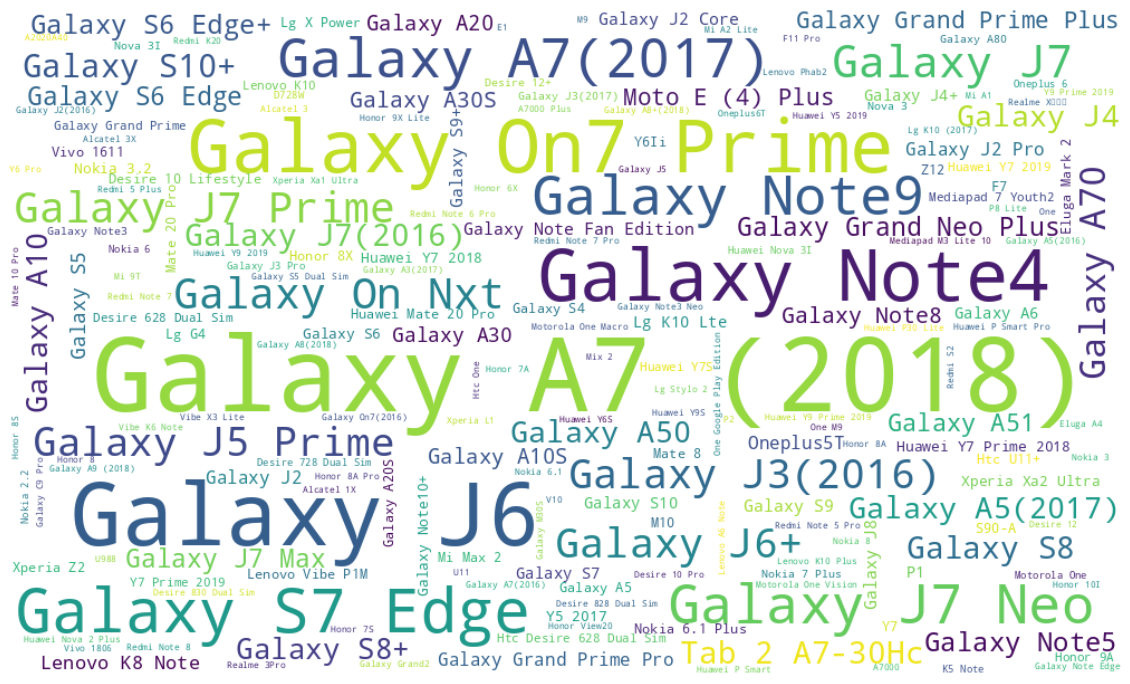

In [35]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Visualization:
I'll plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [36]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0 2019-11-01 18:15:32.097000+00:00         24.639421           46.73017   
1 2019-11-01 18:15:32.505000+00:00         24.639421           46.73017   
2 2019-11-01 18:15:50.376000+00:00         24.639421           46.73017   
3 2019-11-01 18:20:11.389000+00:00         24.639421           46.73017   
4 2019-11-01 18:20:12.035000+00:00         24.639421           46.73017   
5 2019-11-01 18:20:13.264000+00:00         24.639421           46.73017   
6 2019-11-01 18:20:16.996000+00:00         24.639421           46.73017   
7 2019-11-01 18:21:45.695000+00:00         24.639421           46.73017   
8 2019-11-01 18:22:37.206000+00:00         24.639421           46.73017   
9 2019-11-01 18:36:43.521000+00:00         24.626589           46.68925   

  RadioConnectionType RadioNetworkGeneration RadioOperatorName        RSRP  \
0              Mobile                     4G        Operator B        -110   
1              Mobile                     4G        Operator B        -106   
2              Mobile                     4G        Operator B         -93   
3              Mobile                     4G        Operator B        -107   
4              Mobile                     4G        Operator B        -111   
5              Mobile                     4G        Operator B        -106   
6              Mobile                     3G        Operator B  2147483647   
7              Mobile                     3G        Operator B  2147483647   
8              Mobile                     4G        Operator B         -98   
9              Mobile                     4G        Operator C         -95   

  RadioMobileDataEnabled DeviceManufacturer               DeviceName  
0                Enabled            SAMSUNG           Galaxy S7 Edge  
1                Enabled            SAMSUNG           Galaxy S7 Edge  
2                Enabled            SAMSUNG           Galaxy S7 Edge  
3                Enabled            SAMSUNG           Galaxy S7 Edge  
4                Enabled            SAMSUNG           Galaxy S7 Edge  
5                Enabled            SAMSUNG           Galaxy S7 Edge  
6                Enabled            SAMSUNG           Galaxy S7 Edge  
7                Enabled            SAMSUNG           Galaxy S7 Edge  
8                Enabled            SAMSUNG           Galaxy S7 Edge  
9                Enabled            SAMSUNG  Galaxy Grand Prime Plus

In [37]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [49]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# shaded = hv.operation.datashader.datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * shaded

# plot = RSRP_data.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

import xarray as xr
import hvplot.pandas

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def operator_map(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    if (len(df_operator) == 0 ):
        return esri
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"], vdims=["RSRP"])
    # operator_points.opts(color="RSRP", size=hv.dim("RSRP").xr.absolute() * 50 )
    rastered = rasterize(operator_points).opts(cmap=COLORS[operator_name], cnorm="eq_hist", width=1000, height=700)
    operator_highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * rastered * operator_highlight

    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

Column
    [0] RadioButtonGroup(options=['Operator A', ...], value='Operator A')
    [1] ParamFunction(function)

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [39]:
points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri * rastered * highlight 

:DynamicMap   []
   :Overlay
      .Tiles.I  :Tiles   [Longtitude,Latitude]
      .Image.I  :Image   [LocationLongitude,LocationLatitude]   (LocationLongitude_LocationLatitude Count)
      .Points.I :Points   [LocationLongitude,LocationLatitude]   (Timestamp,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName)

This is a plot of the whole dataset we have for all the operators over the whole period we have.

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [40]:
print(RSRP_data.shape)

(2725353, 10)


In [41]:
RSRP_data.drop_duplicates(inplace=True)

In [42]:
print(RSRP_data.shape)

(2723541, 10)


RSRP_data dataframe is now more ready for ML algorithms. I'll save the processed data for later use. The parquet format is used because it keeps the data types, faster during read/write operations and much smaller the csv files

In [43]:
#RSRP_data.to_parquet("./Data/RSRP_data_processed.parq")